In [24]:
from soma import aims 
import matplotlib.pyplot as plt 
import numpy as np 
import os
import matplotlib.ticker as ticker
import itertools
import pandas as pd
import pickle 

import networkx as nx
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='darkgray')
    plt.setp(bp['caps'], color='darkgray')
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], color='darkgray', alpha=0.5)

# Evaluate random parcellation: change from expected vertex number (size)

In [10]:
cls = [64, 128, 256, 512]
hemi = ['left', 'right']

In [11]:
res_counts = {}

for cl in cls:
    print('Clustering: {} '.format(cl*2))
    res_counts[cl] = {}
    res_counts[cl]['left'] = []
    res_counts[cl]['right'] = []
    
    for h in hemi:
        iTEXT = '../../DerivedData/random_parcellation/{}_template_random_parc_pathKmeans_{}_clusters.tex.gii'.format(h, cl)
        text_f = aims.read(iTEXT)
        text_a = np.array(text_f)[0].astype(int)
        
        ## the last one is always cingulate!
        text_a = text_a[text_a != np.max(text_a)]
        
        for label in np.unique(text_a):
            res_counts[cl][h].append(len(text_a[text_a == label]))
    

Clustering: 128 
Clustering: 256 
Clustering: 512 
Clustering: 1024 


In [12]:
pc_diff = {}
for cl  in cls:
    pc_diff[cl] = {}
    pc_diff[cl]['left'] = []
    pc_diff[cl]['right'] = []
    
    for h in hemi:
        a = res_counts[cl][h]
        exp = np.sum(a)/len(a)
        #b = list(map(list, itertools.combinations(a, 2)))
        pc_diff[cl][h] = (np.array(a) - exp) * 100/ np.float(exp)
        #for el in b:
        #    
        #    pc_diff[cl][h].append(el[0] *100/ np.float(len(a) ))

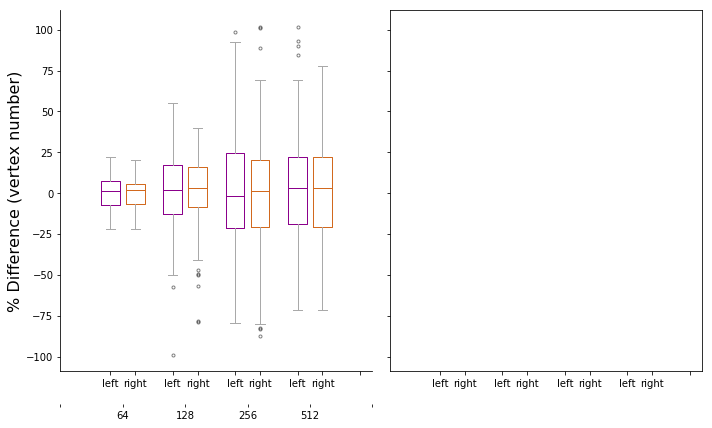

In [15]:

fig, axs = plt.subplots(1,2,  figsize=(10,6),sharey=True,sharex=True)
#for i, cl in enumerate(cls):
bpl = axs[0].boxplot([pc_diff[cl]['left'] for cl in cls], positions=np.arange(len(cls)) - 0.2, 
                    sym='.', widths=0.3, vert=True, showfliers=True, labels=['left', 'left','left','left'])
set_box_color(bpl, 'darkmagenta')
    
bpr = axs[0].boxplot([pc_diff[cl]['right'] for cl in cls], positions=np.arange(len(cls)) + 0.2, 
                    sym='.', widths=0.3, vert=True, showfliers=True, labels=['right','right','right','right'])
set_box_color(bpr, 'chocolate')


axs[0].set_ylabel('% Difference (vertex number)', fontsize=16)


axs[0].set_xticks([-0.2,0.2, 0.8,1.2, 1.8,2.2, 2.8, 3.2, 3.8, 4.2])
axs[0].set_xticklabels(['left', 'right','left', 'right', 'left', 'right', 'left', 'right'])
axs[0].tick_params(labelsize=10)
#axs[0].plot([], c='chocolate', label='right')
#axs[0].plot([], c='darkmagenta', label='left')
#axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), 
#           ncol = 4, fontsize=18, frameon=False, markerscale=0.6) 
axs[0].set_xlim([-1, 4])

# Second X-axis
ax2 = axs[0].twiny()

ax2.set_frame_on(False)

ax2.spines["bottom"].set_position(("axes", -0.10))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major', labelsize=22)
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.set_xticks([0, 1, 2,3,4, 5])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([1,2,3,4]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(cls))

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)


fig.patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('../../Results/figures/random_parcelation_regions.png', dpi=500)
plt.show()

# Metric projection - QC & visualisation 

In [20]:
subjects = pd.read_csv('../../DerivedData/replication_cohort_all_subjects_current.csv', 
                                         names=['subject_id', 'session_id', 'template'])

## get number of vertices which are 0 (== wrongly projected) per subject
out= []
for i, row in subjects.iterrows():  
    metric = 'FA'
   
    s = 0. 
    a = 0.
    
    for hemi in ['left', 'right']:
        iM = '../../DerivedData/subjects/sub-{}/ses-{}/sub-{}_ses-{}_{}_texture_{}_majority.gii'.format(
                                row.subject_id, row.session_id, row.subject_id, row.session_id, hemi, metric)
        if os.path.isfile(iM):
            text_f = aims.read(iM)
            text_a = np.array(text_f)[0]
            
            s = s + len(text_a[text_a == 0.]) 
            a = a + len(text_a)
    
    p = np.round(s/a,3)        
    out.append(p)
    if s != 0:
        print(row.subject_id, s, p)   

('CC00072XX07', 10.0, 0.0)
('CC00091XX10', 41.0, 0.0)
('CC00100XX01', 168.0, 0.001)
('CC00109XX10', 106.0, 0.001)
('CC00139XX16', 706.0, 0.004)
('CC00153XX05', 31.0, 0.0)
('CC00155XX07', 35.0, 0.0)
('CC00159XX11', 92.0, 0.0)
('CC00171XX07', 238.0, 0.001)
('CC00189XX17', 621.0, 0.003)
('CC00200XX02', 61.0, 0.0)
('CC00223XX09', 469.0, 0.003)
('CC00399XX21', 181.0, 0.001)
('CC00400XX04', 4.0, 0.0)
('CC00538XX19', 1689.0, 0.01)
('CC00566XX14', 1613.0, 0.009)
('CC00765XX15', 160.0, 0.001)
('CC00947XX24', 832.0, 0.004)
('CC01105XX08', 15.0, 0.0)
('CC01194XX16', 68413.0, 0.301)


Removed the 12 subjects with % > 0 from the analysis!

In [22]:
#==== All metrics in a loop ====#
results = {'L1' : [], 
          'RD' : [],
          'MD' : [],
          'FA' : []}


for i, row in subjects.iterrows():   
    if i % 50 == 0 :
        print(row.subject_id)
    for metric in ['L1', 'RD', 'MD', 'FA']:
        s = 0. 
        a = 0.
        for hemi in ['left', 'right']:
            iM = '../../DerivedData/subjects/sub-{}/ses-{}/sub-{}_ses-{}_{}_texture_{}_majority.gii'.format(
                                row.subject_id, row.session_id, row.subject_id, row.session_id, hemi, metric)
            if os.path.isfile(iM):
                text_f = aims.read(iM)
                text_a = np.array(text_f)[0]
                
                s = s + len(text_a[text_a == 0.])
                a = a + len(text_a)
        p = np.round(s/a,3)
        results[metric].append(p)
        
        

#oFile = '../../Results/files/QC/metric_projection_num_of_0roes_in_anatomy.pickle'
#with open(oFile, 'wb') as handle:
#    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

#with open(oFile, 'rb') as handle:
#    results = pickle.load(handle)        

CC00063AN06
CC00144XX13
CC00260XX05
CC00371XX09
CC00482XX13
CC00585XX17
CC00788XX22
CC00958XX18


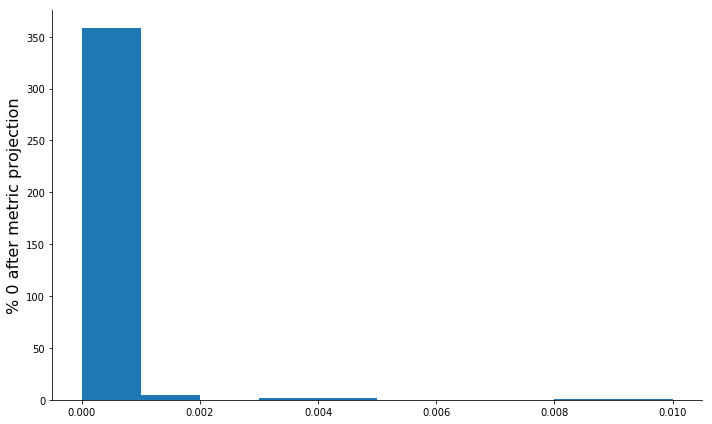

In [23]:
metrics = ['L1', 'RD', 'MD', 'FA']
fig, axs = plt.subplots(1,1,  figsize=(10,6),sharey=True,sharex=True)
#for i, cl in enumerate(cls):

a = np.array(results['FA'])
a = a[a<0.3]

#bpl = axs.boxplot(a, positions=np.arange(1) ,
#sym='.', widths=0.3, vert=True, showfliers=True, labels=['FA'])
#bpl = axs.boxplot(results['.values()'], positions=np.arange(len(results.keys())) ,
#                    sym='.', widths=0.3, vert=True, showfliers=True, labels=results.keys())
plt.hist(a)
set_box_color(bpl, 'darkmagenta')

axs.set_ylabel('% 0 after metric projection', fontsize=16)

axs.tick_params(labelsize=10)
#axs.set_xlim([-1, 1])

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

#axs.set_ylim(0,0.01)


fig.patch.set_facecolor('white')
plt.tight_layout()
#plt.savefig('../../Results/figures/metric_projection_percent0.png', dpi=500)
plt.show()

# Evaluation of segmentation corrections

In [25]:
subjects = pd.read_csv('../../DerivedData/cohortA_subjects_clinical.csv', index_col=0)
scheme = pd.read_csv('../../SourceData/atlas_labelling_scheme.csv')

### get only the subjects of cohort one (after exclusions etc)
with open('../../DerivedData/cohorts_subjects_list_python2.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)
    
subjects = subjects[subjects.subject_id.isin(cohorts['A'])]

In [26]:
def get_blob_dict(iTex_path, iMesh_path):
    
    iTex = aims.read(iTex_path)
    iMesh = aims.read(iMesh_path)
    
    segm = np.array(iTex)[0][:].ravel()
    vert, poly = np.array(iMesh.vertex()) ,np.array(iMesh.polygon())

    edges = [(edge[0], edge[1]) for edge in poly]
    edges.extend([(edge[1], edge[2]) for edge in poly])
    edges.extend([(edge[2], edge[0]) for edge in poly])

    G = nx.Graph()
    nodes = [(i, {'label' : segm[i]}) for i in range(len(vert))]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    # labels 
    labels = np.unique(segm)[1:].astype(int)
    
    res = {}
    for label in labels: 
        res[label] = []
        # to create subgraph with only those labels
        to_keep = [node for node in G.nodes() if G.node[node]['label'] == label]
        H = G.subgraph(to_keep)
    
        for component in list(nx.connected_components(H)):
            res[label].append(len(component)*100./len(to_keep))
    return  res

def get_error(d):
    #error = 0 
    #for key in d.keys():
    #    for el in d[key]:
    #        error = error + (100-el)
    
    error=0
    for key in d.keys():
        
        n_el = len(d[key])
        diff = np.abs(((np.max(d[key]) - np.min(d[key])) - 100))
        
        if n_el != 1:
            error = error + (n_el*diff)
    return error


In [27]:
df = pd.DataFrame()

new_loc = 0
for i, row in subjects.iterrows():

    scheme = pd.read_csv('../../SourceData/atlas_labelling_scheme.csv')
    subj_id = row.subject_id
    session_id = row.session_id
    hemi='left'
    h='L'

    print(subj_id, session_id, hemi)
    
    pre = '../../DerivedData/subjects/sub-{}/ses-{}/sub-{}_ses-{}_{}_texture_cortex_voronoi_majority.gii'.format(subj_id, session_id,subj_id, session_id,hemi)
    post = '../../DerivedData/subjects/sub-{}/ses-{}/sub-{}_ses-{}_neoAtlas_corrected_{}.gii'.format(subj_id, session_id,subj_id, session_id,hemi)
    wm = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_anat_pipeline/sub-{}/ses-{}/anat/sub-{}_ses-{}_T2w_{}white_bv_transformed.gii'.format(subj_id, session_id,subj_id, session_id,  h)
    
    if os.path.isfile(pre) and os.path.isfile(post):
        df.loc[new_loc, 'subject_id'] = subj_id
        df.loc[new_loc, 'session_id'] = session_id
        
        df.loc[new_loc, 'PMA_scan'] = subjects[subjects.subject_id == subj_id].PMA_scan.values[0]
        df.loc[new_loc, 'diff'] = np.abs(subjects[subjects.subject_id == subj_id].template.values[0] - subjects[subjects.subject_id == subj_id].PMA_scan.values[0]).round(3)
        
        pre_res = get_blob_dict(iTex_path=pre, iMesh_path=wm)
        df.loc[new_loc,'pre_error_L'] = get_error(pre_res)

        post_res = get_blob_dict(iTex_path=post, iMesh_path=wm)
        df.loc[new_loc,'post_error_L'] = get_error(post_res)
        
    hemi='right'
    h='R'

    print(subj_id, session_id, hemi)
    
    pre = '../../DerivedData/subjects/sub-{}/ses-{}/sub-{}_ses-{}_{}_texture_cortex_voronoi_majority.gii'.format(subj_id, session_id,subj_id, session_id,hemi)
    post = '../../DerivedData/subjects/sub-{}/ses-{}/sub-{}_ses-{}_neoAtlas_corrected_{}.gii'.format(subj_id, session_id,subj_id, session_id,hemi)
    wm = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_anat_pipeline/sub-{}/ses-{}/anat/sub-{}_ses-{}_T2w_{}white_bv_transformed.gii'.format(subj_id, session_id,subj_id, session_id,  h)
    
    if os.path.isfile(pre) and os.path.isfile(post):
        
        pre_res = get_blob_dict(iTex_path=pre, iMesh_path=wm)
        df.loc[new_loc,'pre_error_R'] = get_error(pre_res)

        post_res = get_blob_dict(iTex_path=post, iMesh_path=wm)
        df.loc[new_loc,'post_error_R'] = get_error(post_res)
        
    new_loc = new_loc +1

('CC00063AN06', 15102, 'left')


KeyboardInterrupt: 

In [30]:
#df.to_csv('../../Results/files/QC/pre_post_segmentation_error_cohortA.csv')
df = pd.read_csv('../../Results/files/QC/pre_post_segmentation_error_cohortA.csv', index_col=0)

### correlation with PMA at scna & difference of age from the template

In [31]:
for i, row in df.iterrows():
    #mn = np.mean([row.pre_error_L, row.pre_error_R])
    #print(row.subject_id, mn)
    df.loc[i, 'mean_error_pre'] = np.mean([row.pre_error_L, row.pre_error_R]) 
    df.loc[i, 'mean_error_post'] =np.mean([row.post_error_L, row.post_error_R])

In [33]:
print('Before corrections:')
print('Mean error {:.3f} (std {:.3f})'.format(np.mean(df.mean_error_pre.values), np.std(df.mean_error_pre.values)))
r,p = pearsonr(df['PMA_scan'].values, df.mean_error_pre.values)
print('Correlation with PMA at scan r={:.3f} (p={})'.format(r,p))
r,p = pearsonr(df['diff'].values, df.mean_error_pre.values)
print('Correlation with delta template scan r={:.3f} (p={})'.format(r,p))

print('After corrections:')
print('Mean error {:.3f} (std {:.3f})'.format(np.mean(df.mean_error_post.values), np.std(df.mean_error_post.values)))
r,p = pearsonr(df['PMA_scan'].values, df.mean_error_post.values)
print('Correlation with PMA at scan r={:.3f} (p={})'.format(r,p))
r,p = pearsonr(df['diff'].values, df.mean_error_post.values)
print('Correlation with delta template scan r={:.3f} (p={})'.format(r,p))

Before corrections:
Mean error 2283.677 (std 474.594)
Correlation with PMA at scan r=0.394 (p=2.27855094215e-12)
Correlation with delta template scan r=0.421 (p=4.15759223632e-14)
After corrections:
Mean error 167.056 (std 94.779)
Correlation with PMA at scan r=-0.042 (p=0.47239528144)
Correlation with delta template scan r=0.008 (p=0.897915296157)
